# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 60**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [4]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [5]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [4]:
# Determine the rows and columns in the data using the shape attribute of pandas
# dataframe
df.shape



(1898, 9)

#### Observations:

Using the shape attribute of pandas dataframe the number of rows and columns is 1898 and 9 respectively


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [5]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [6]:
# Calculating the total number of missing values of each column
df.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


#### Observations:
Using the sum method on the isnull method of dataframe we see that there are no columns that have a missing value

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [11]:
# Code for statistical summary
df.describe().T.map('{:f}'.format)


,count,mean,std,min,25%,50%,75%,max
order_id,1898.000000,1477495.500000,548.049724,1476547.000000,1477021.250000,1477495.500000,1477969.750000,1478444.000000
customer_id,1898.000000,171168.478398,113698.139743,1311.000000,77787.750000,128600.000000,270525.000000,405334.000000
cost_of_the_order,1898.000000,16.498851,7.483812,4.470000,12.080000,14.140000,22.297500,35.410000
food_preparation_time,1898.000000,27.371970,4.632481,20.000000,23.000000,27.000000,31.000000,35.000000
delivery_time,1898.000000,24.161749,4.972637,15.000000,20.000000,25.000000,28.000000,33.000000


#### Observations:
Based on the summary provided by the describe method of pandas dataframe :

1) The minimum food preparation time is  :  20
2) The maximum food preparation time is  :  35
3) The average food preparation time is. :  27.371970

### **Question 5:** How many orders are not rated? [1 mark]

In [20]:
# Code to find orders that are not rated
# Done by using the shape attribute on the output of entries filtered with
# rating == 'Not given'. shape[0] gives the number of rows which in turns gives
# the output which we are interested in

df[df['rating'] == 'Not given'].shape[0]

736

#### Observations:
There are 736 orders for which ratings were not given

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

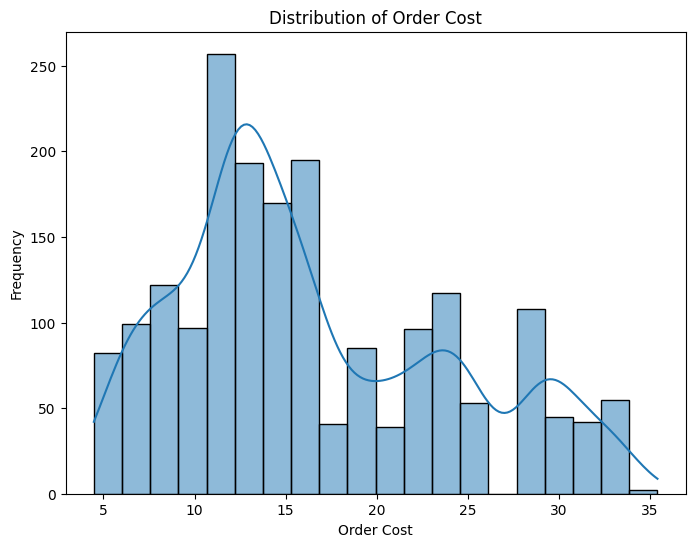

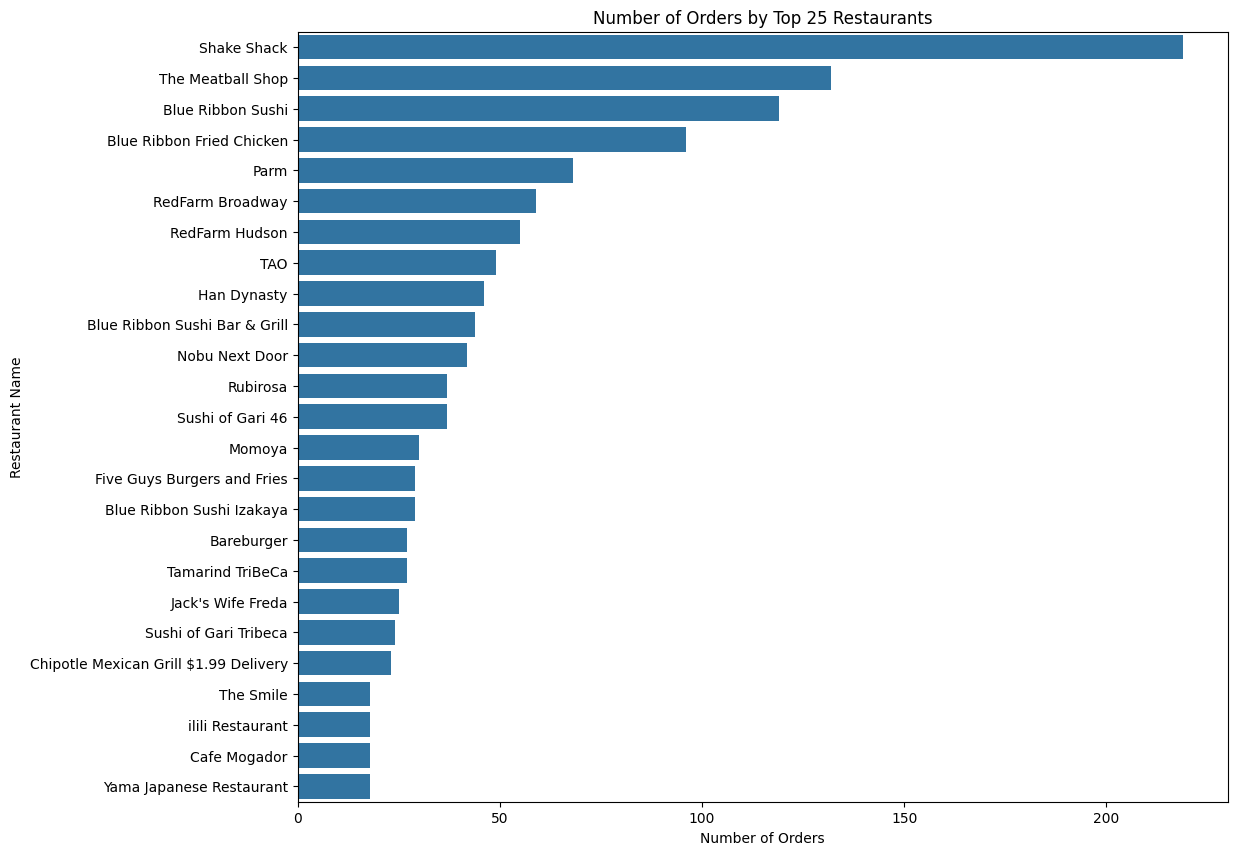

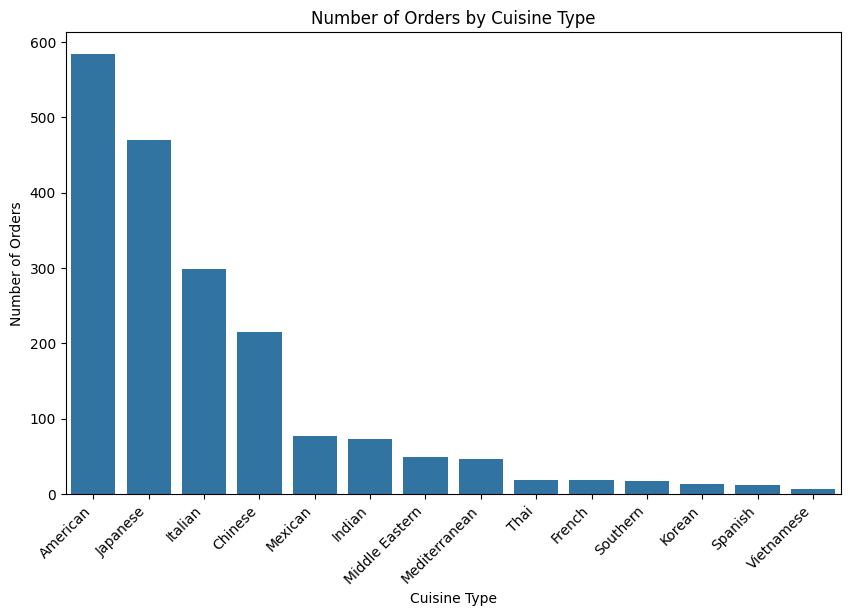

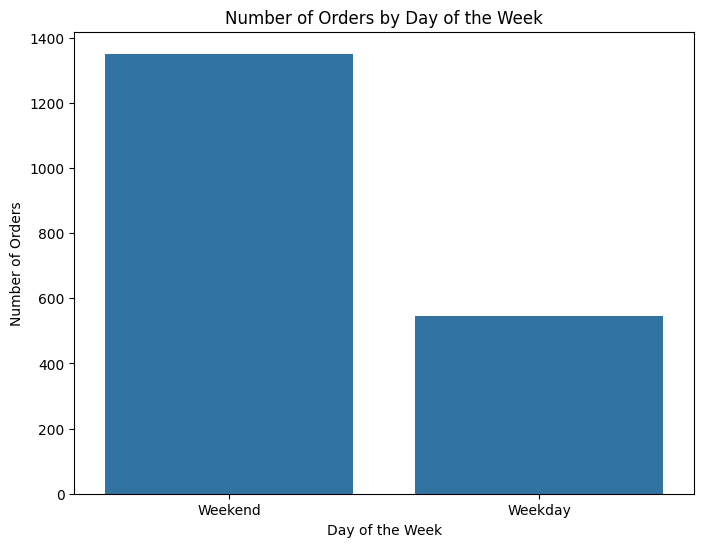

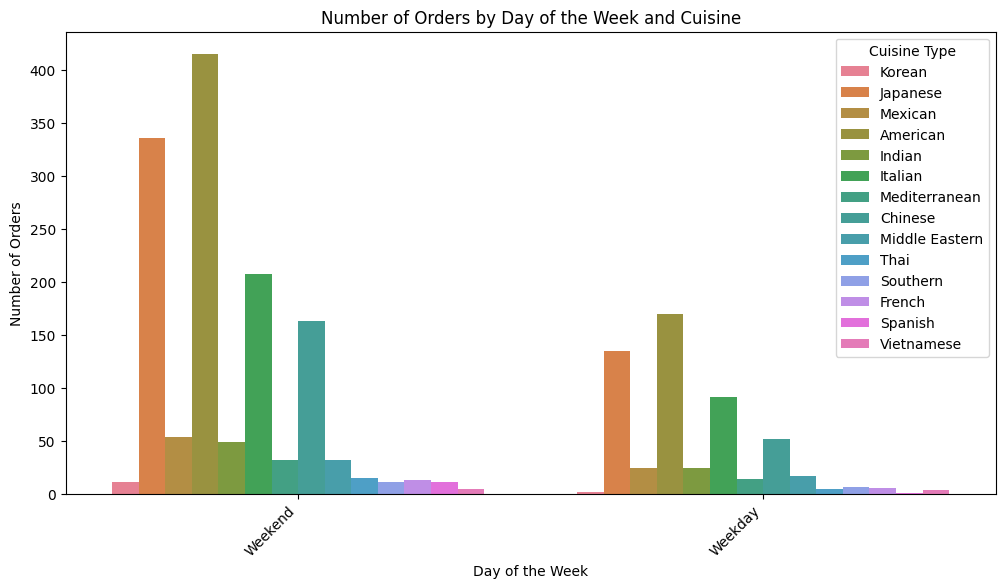

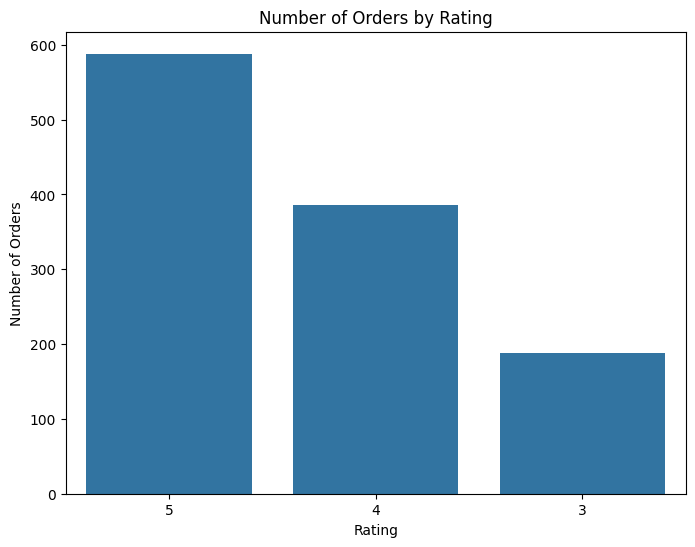

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for 'cost_of_the_order'
plt.figure(figsize=(8, 6))
# setting kde=True to plot kernel density estimate
sns.histplot(df['cost_of_the_order'], bins=20, kde=True)
plt.title('Distribution of Order Cost')
plt.xlabel('Order Cost')
plt.ylabel('Frequency')
plt.show()



###########################################################################
# countplot to plot top 25 restaurants based on number of orders
# Get the top 25 restaurants
top_25_restaurants = df['restaurant_name'].value_counts().nlargest(25).index

# Filter the dataframe to include only the top 25 restaurants
filtered_df = df[df['restaurant_name'].isin(top_25_restaurants)]

# Create the count plot for the top 50 restaurants
plt.figure(figsize=(12, 10))  # Adjust figure size if needed
sns.countplot(y='restaurant_name', data=filtered_df, order=top_25_restaurants)
plt.title('Number of Orders by Top 25 Restaurants')
plt.xlabel('Number of Orders')
plt.ylabel('Restaurant Name')
plt.show()
############################################################################

#countplot for popular cuisines based on number of orders
plt.figure(figsize=(10, 6))
sns.countplot(x='cuisine_type', data=df, order=df['cuisine_type'].value_counts().index)
plt.title('Number of Orders by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right')
plt.show()

#countplot for number of orders for category weekday or  weekend
plt.figure(figsize=(8, 6))
sns.countplot(x='day_of_the_week', data=df, order=df['day_of_the_week'].value_counts().index)
plt.title('Number of Orders by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.show()

#countplot for number of orders categorized by weekday or weekend for hue based on cuisine
plt.figure(figsize=(12, 6))
sns.countplot(x='day_of_the_week', data=df, hue='cuisine_type')
plt.title('Number of Orders by Day of the Week and Cuisine')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.legend(title='Cuisine Type', loc='upper right')
plt.show()

# Count plot for 'rating'
plt.figure(figsize=(8, 6))
sns.countplot(x='rating', data=df, order=df['rating'].value_counts().index)
plt.title('Number of Orders by Rating')
plt.xlabel('Rating')
plt.ylabel('Number of Orders')
plt.show()




### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [54]:

top_5_restaurants = df['restaurant_name'].value_counts().nlargest(5)
print(top_5_restaurants)

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64


#### Observations:
Based on the code above the below is the list of top 5 restaurants :

1.   Shake Shack                  219
2.   The Meatball Shop            132
3.   Blue Ribbon Sushi            119
4.   Blue Ribbon Fried Chicken     96
5.   Parm                          68

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [55]:
df[df['day_of_the_week'] == 'Weekend']['cuisine_type'].value_counts().idxmax()

'American'

#### Observations:
American cuisine is the most popular cuisine on weekends. This is shown in the countplot 'Number of Orders by Day of the Week and Cuisine' as well


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [58]:
df[df['cost_of_the_order'] > 20].value_counts().sum() / df.shape[0] * 100

29.24130663856691

#### Observations:
29.24% of the orders cost more than 20 dollars


### **Question 10**: What is the mean order delivery time? [1 mark]

In [59]:
df['delivery_time'].mean()

24.161749209694417

#### Observations:
The mean order delivery time is 24.16 minutes


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [116]:
# Write the code here
top_3_customers = df['customer_id'].value_counts().nlargest(3)
print(top_3_customers)



customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64


,count
cuisine_type,
American,4
Japanese,4
Spanish,1


#### Observations:
Below is the list of top 3 customers :

1.   52832    13
2.   47440    10
3.   83287     9

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


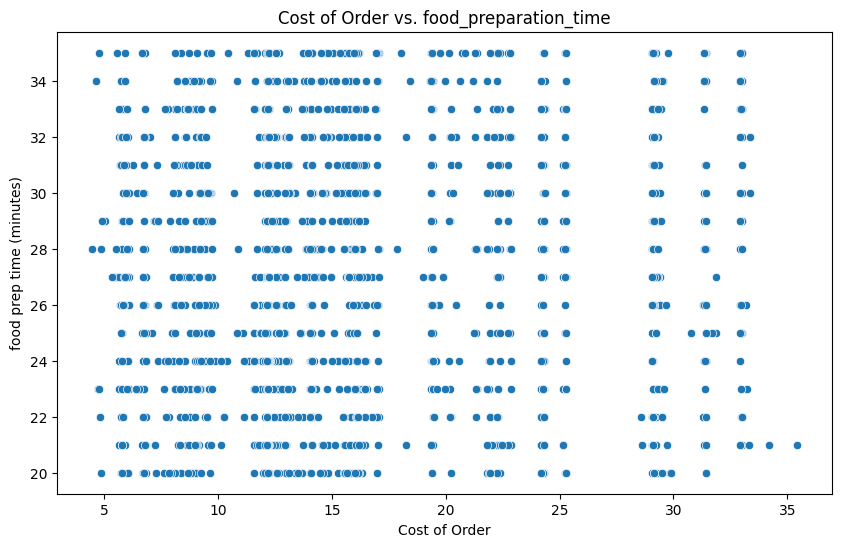

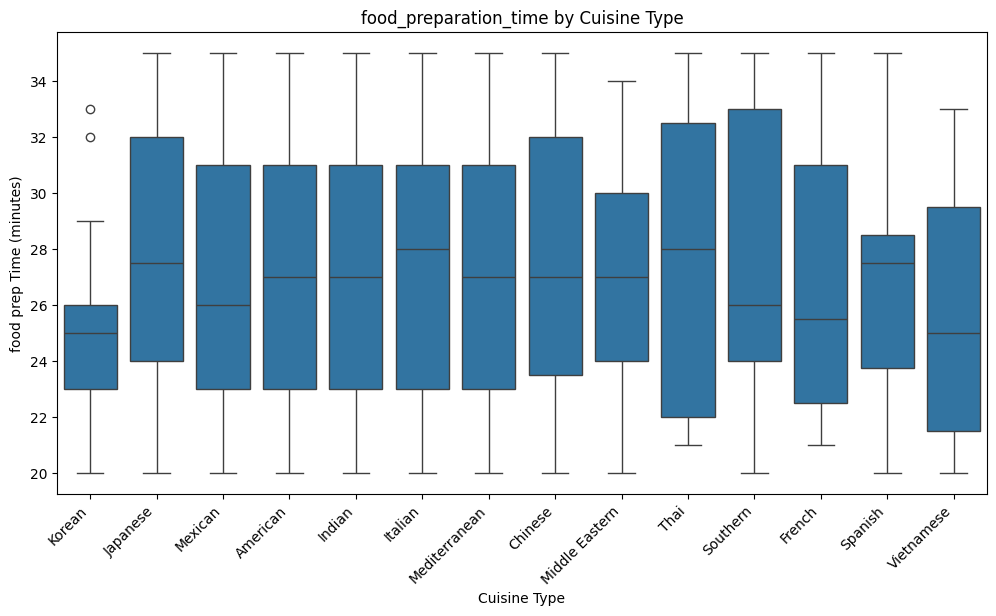

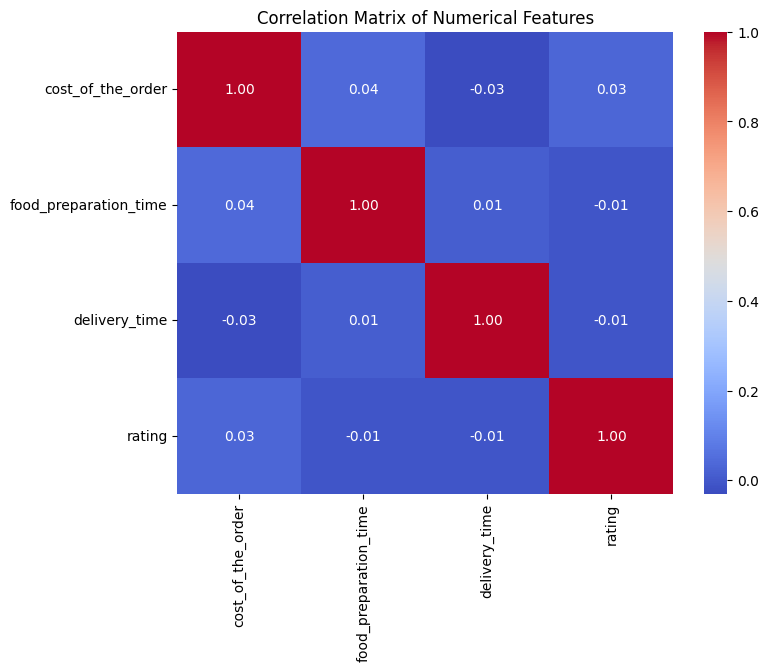

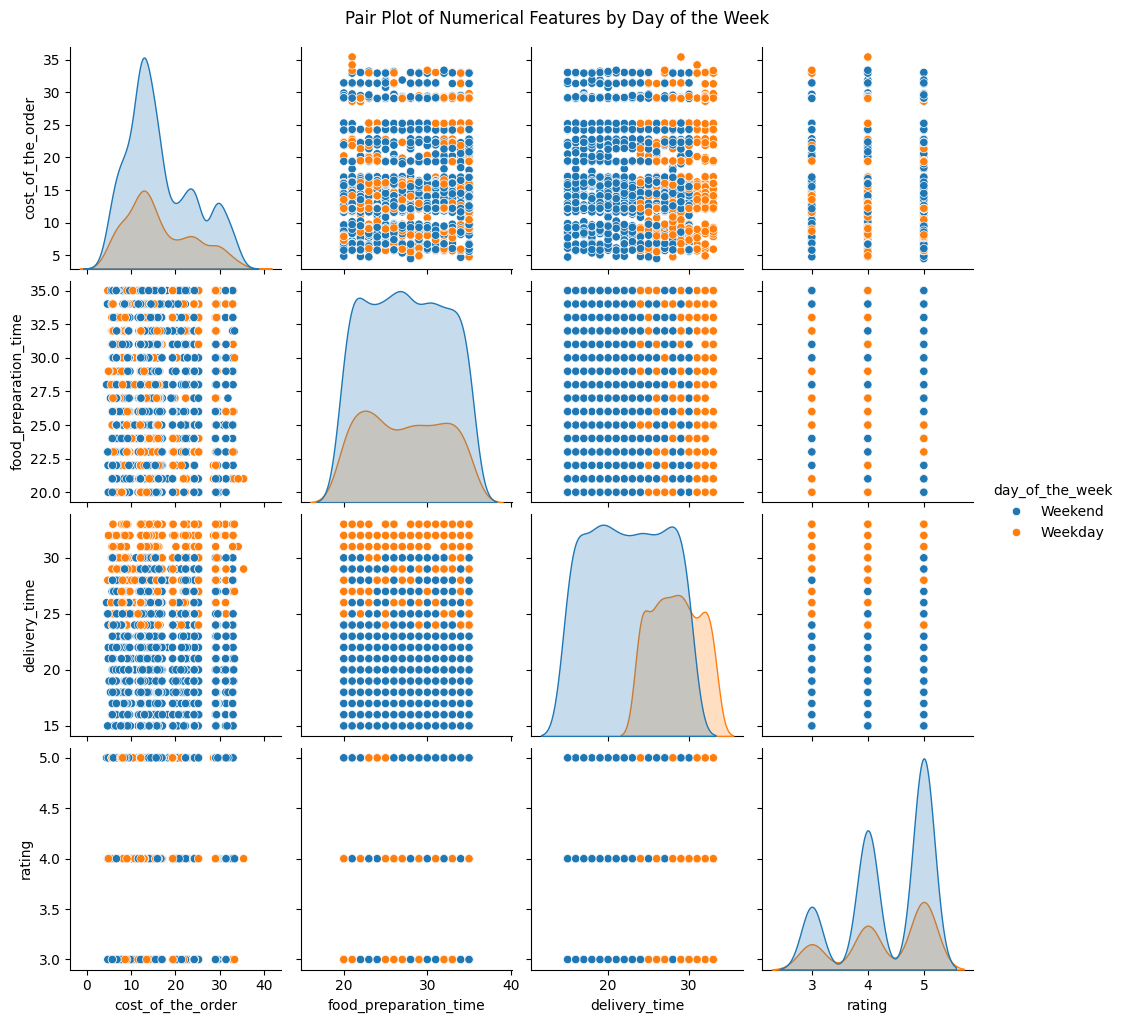

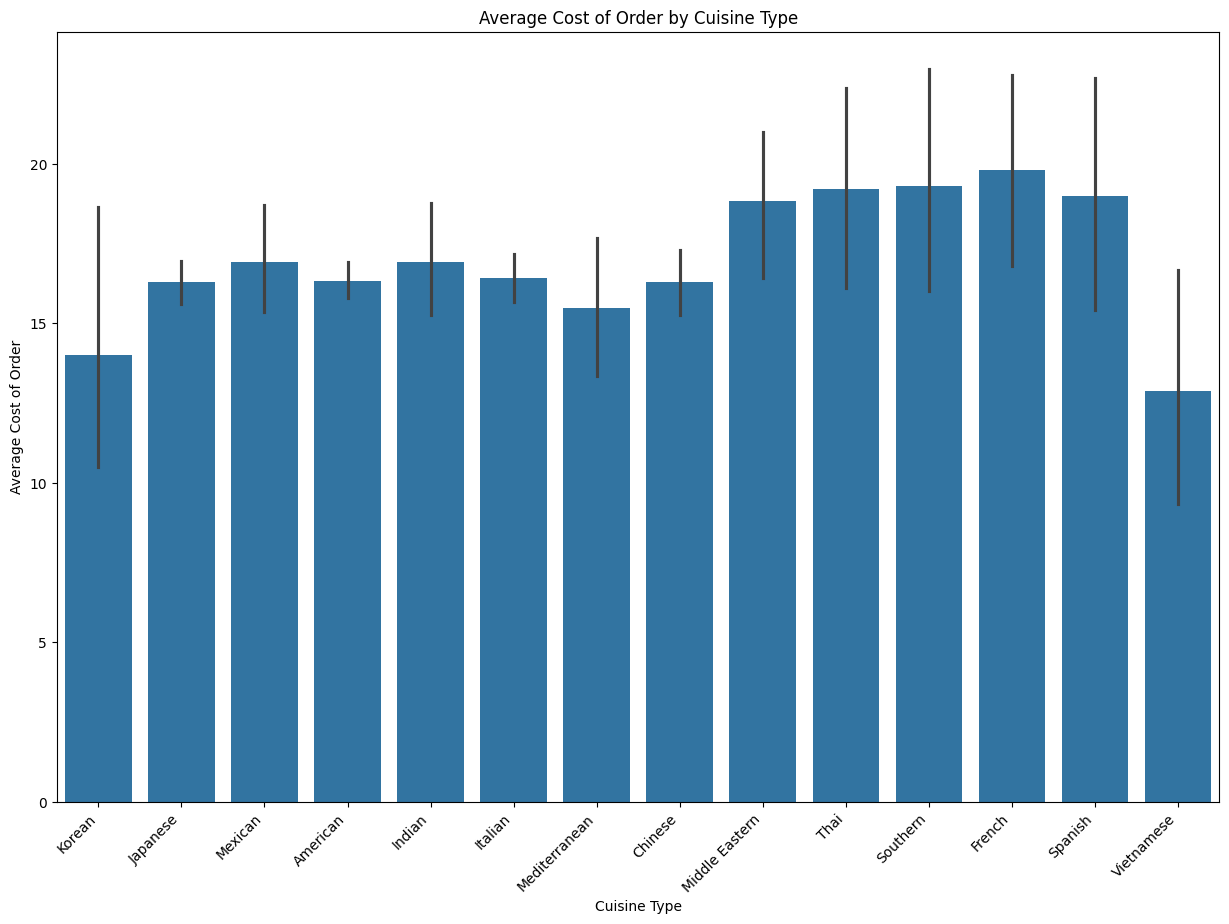

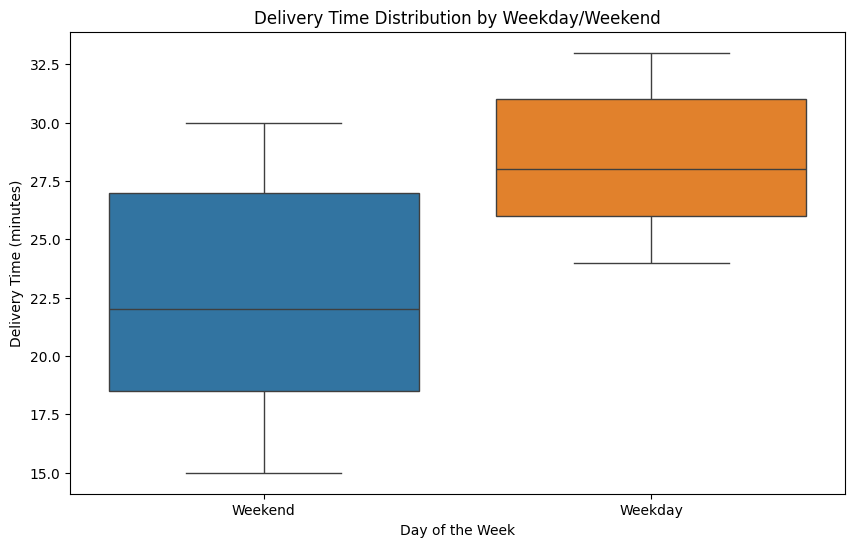

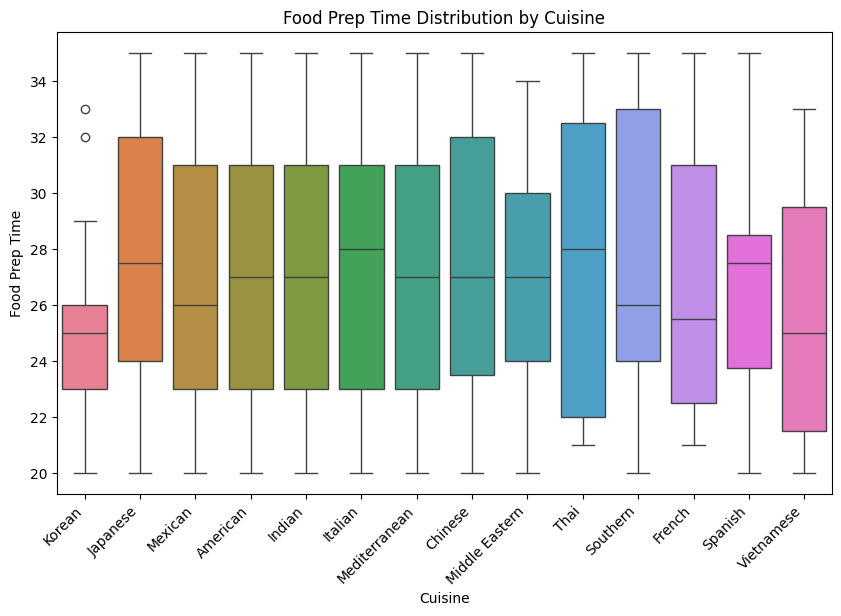

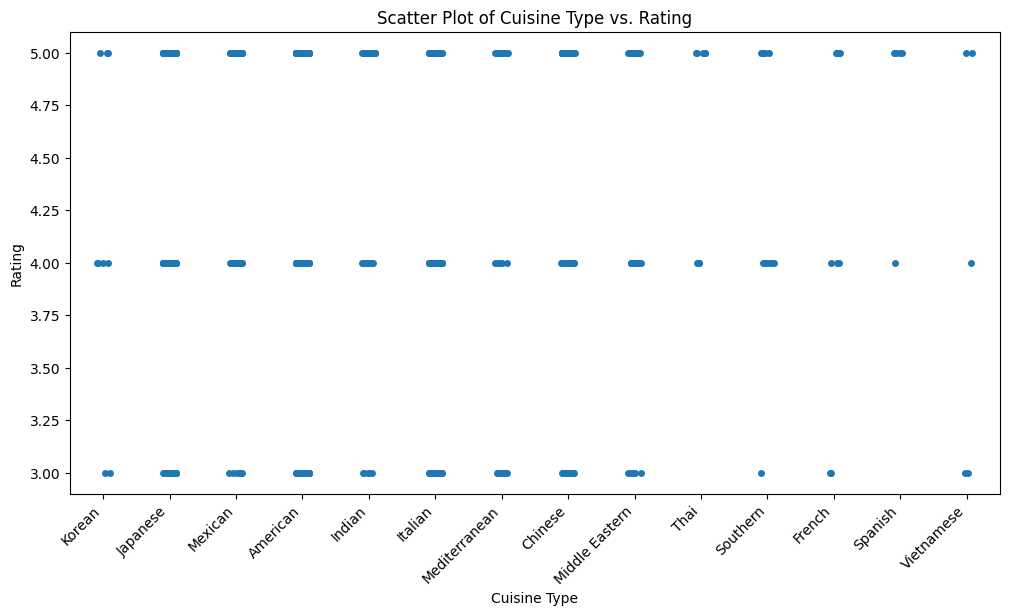

In [118]:


# Scatter plot for 'cost_of_the_order' vs. 'food_prep_time'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='cost_of_the_order', y='food_preparation_time', data=df)
plt.title('Cost of Order vs. food_preparation_time')
plt.xlabel('Cost of Order')
plt.ylabel('food prep time (minutes)')
plt.show()

# Box plot for 'delivery_time' vs. 'cuisine_type'
plt.figure(figsize=(12, 6))
sns.boxplot(x='cuisine_type', y='food_preparation_time', data=df)
plt.title('food_preparation_time by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('food prep Time (minutes)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

# Heatmap for correlation between numerical features
numerical_features = ['cost_of_the_order', 'food_preparation_time', 'delivery_time', 'rating']
correlation_matrix = df[numerical_features].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Pair plot for numerical features colored by 'day_of_the_week'
sns.pairplot(df[numerical_features + ['day_of_the_week']], hue='day_of_the_week')
plt.suptitle('Pair Plot of Numerical Features by Day of the Week', y=1.02)  # Adjust title position
plt.show()

plt.figure(figsize=(15, 10))  # Adjust figure size if needed
sns.barplot(x='cuisine_type', y='cost_of_the_order', data=df)
plt.title('Average Cost of Order by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Average Cost of Order')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.show()

# Boxplot for delivery_time for the categories Weekday and Weekend
plt.figure(figsize=(10, 6))
sns.boxplot(x='day_of_the_week', y='delivery_time', data=df, hue='day_of_the_week')
plt.title('Delivery Time Distribution by Weekday/Weekend')
plt.xlabel('Day of the Week')
plt.ylabel('Delivery Time (minutes)')
plt.show()

# Boxplot for food prep time based on cuisine to get an idea as to
# whether some cuisines take lesser or greater times compared to others
plt.figure(figsize=(10, 6))
sns.boxplot(x='cuisine_type', y='food_preparation_time', data=df, hue='cuisine_type')
plt.title('Food Prep Time Distribution by Cuisine')
plt.xlabel('Cuisine')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Food Prep Time')
plt.show()

plt.figure(figsize=(12, 6))  # Adjust figure size if needed
sns.stripplot(x='cuisine_type', y='rating', data=df, jitter=True)  # Use stripplot for categorical x-axis
plt.title('Scatter Plot of Cuisine Type vs. Rating')
plt.xlabel('Cuisine Type')
plt.ylabel('Rating')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [84]:
# Group df by restaurant name
restaurant_groups = df.groupby('restaurant_name')

# Define a function to count rated orders (excluding 'Not given')
def count_rated_orders(group):
    return group['rating'].apply(lambda y: y != 'Not given').sum()

# Define a function to calculate average rating (treating 'Not given' as 0)
def calculate_average_rating(group):
    return group['rating'].apply(lambda y: float(y) if y != 'Not given' else 0).mean()

# Filter groups based on conditions
filtered_groups = restaurant_groups.filter(lambda x: count_rated_orders(x) > 50 and calculate_average_rating(x) > 4)

# Extract restaurant names, get unique values, and convert to list
restaurants = filtered_groups['restaurant_name'].unique().tolist()

print(restaurants)

['Blue Ribbon Fried Chicken', 'The Meatball Shop', 'Shake Shack', 'RedFarm Hudson', 'Blue Ribbon Sushi', 'Parm', 'RedFarm Broadway']


#### Observations:
'Blue Ribbon Fried Chicken', 'The Meatball Shop', 'Shake Shack', 'RedFarm Hudson', 'Blue Ribbon Sushi', 'Parm', 'RedFarm Broadway' are the restaurants that qualify for the offer



### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [95]:
#Calculate revenue on orders greaten than 20 dollars
rev_for_cost_greater_than_20 = df[df['cost_of_the_order'] > 20]['cost_of_the_order'].sum() * 0.25
#Calculate revenue on orders greaten than 5 dollars and lesser than or equla to 20 dollars
rev_for_cost_greater_than_5 = df[(df['cost_of_the_order'] > 5) & (df['cost_of_the_order'] <= 20)]['cost_of_the_order'].sum() * 0.15

total_revenue = rev_for_cost_greater_than_20 + rev_for_cost_greater_than_5
print(total_revenue)


6166.303


#### Observations:
The revenue is calculated in two parts. First, a 25% revenue is calculated on the sum of orders that are more than 20 dollars. Second, a 15% revenue is calculated on the sum of orders that are more than 5 dollars and lesser than or equal to 20 dollars. The sum of the two gives the required revenue.

The total_revenue is 6166.303 dollars


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [89]:
#create a new column for total time
df['total_time'] = df['food_preparation_time'] + df['delivery_time']
#filter entries with total time > 60 minutes and calculate percentage using num
#rows in denominator obtained using df.shape[0]
df[df['total_time'] > 60].value_counts().sum() / df.shape[0] * 100


6.269757639620653

#### Observations:
6.27 % orders take more than 60 minutes to be prepared and delivered


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [96]:
# group the df by day_of_the_week and find respective delivery times
df.groupby('day_of_the_week')['delivery_time'].mean()

,delivery_time
day_of_the_week,
Weekday,28.340037
Weekend,22.470022


#### Observations:
The mean delivery time for Weekday is 28.340037 minutes
The mean delivery time for Weekend is 22.470022 minutes

The mean delivery time for Weekend is lesser than that of Weekday


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
##  Restaurant based conclusions
*   Shake shack, The Meatball Shop,Blue Ribbon Sushi,Blue Ribbon Fried chicken and Parm are the top restaurants based on number of orders
*   Blue Ribbon Fried Chicken, The Meatball Shop, Shake Shack, RedFarm Hudson, Blue Ribbon Sushi, Parm, RedFarm Broadway have more than 50 ratings and their average rating is more than 4 and hence they qualify for promotional offers

##  Cuisine preferences
*   American cuisine is the most popular cuisine
*   American cuisine is preferred on the weekend as well
*   Italian,Japanese and Chinese are next preferred cuisines in that order

## Delivery timings
*   About 93% of the orders are within 60 minutes from the time of order by customer. This indicates that the delivery infrastructure of the company is quite effective.
*   The delivery timings are shorter compared to weekdays

## Cost
*  Large number of orders are in the range 10 to 20 dollars. The number of orders that cost more than 20 dollars are comparatively lesser

## Ratings
*  There are a lot of 4 and 5 ratings which indicates customers and generally happy with the services

### Recommendations
*  There are many orders for which rating is 'Not given'. There is potential of motivating customers to provide feedback through promotional offers
*  There is potential to investigate reasonings for low orders provided for order and see if there is any service based scope for improvements
*  The third and fourth preferred cuisines viz Japanese and Chinese cuisines have a huge gap wrt to the most preferred cuisine viz. American. There is scope for increasing order for these cuisines
*  Targetted promotional offers could be provided for cuisines which have least number of orders viz. Korean,Spanish,Vietnamese
*  Each cuisine has lesser number of orders on weekdays compared to weekends. Promotional weekday lunch offers targetting working professionals would be very beneficial as well
* Around 6% of orders which have taken more than 60 minutes need further analysis. Need to analyze if the delay is delivery employee based, a particular route based etc.   









---